In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [1]:
import tweepy

In [3]:
consumer_key = 'consumerkey'
consumer_secret = 'consumersecret'
access_token = '264955050-accesstoken'
access_token_secret = 'accesstokensecret'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

In [7]:
auth.set_access_token(access_token, access_token_secret)

In [8]:
api = tweepy.API(auth)

In [9]:
public_tweets = api.home_timeline()

In [2]:
tweets_data_path = '/home/saniya/Code/pythonprojects/twitter_data.txt'

In [3]:
tweets_data = []
tweets_file = open(tweets_data_path, 'r')

In [5]:
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [6]:
print len(tweets_data)

457


In [7]:
tweets = pd.DataFrame()

In [11]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

In [23]:
tweets_by_lang = tweets.lang.value_counts()

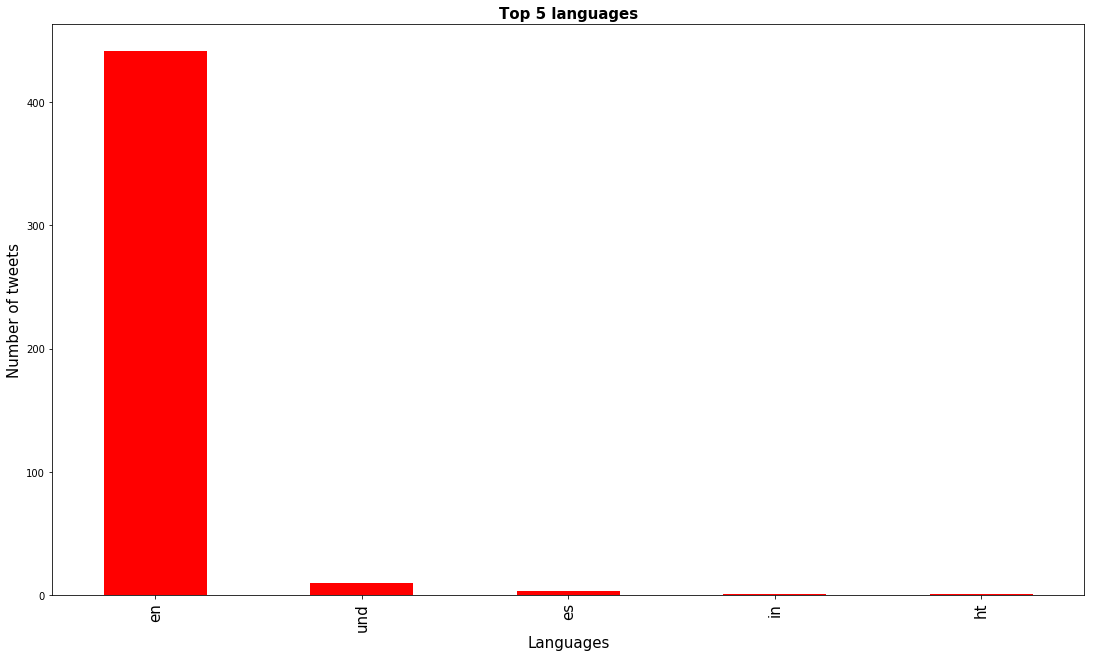

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color = 'red')

In [40]:
#tweets by country
tweets_by_country = tweets.country.value_counts()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_count[:5].plot(ax=ax, kind='bar', color = 'red')